# **Dataset Symbol Generator**

In [1]:
import random
import json
import os
from PIL import Image, ImageDraw, ImageFont
import cv2
import numpy as np
from collections import defaultdict, Counter
import math

class CopialeSymbolGenerator:
    def __init__(self, font_path):
        self.font_path = font_path
        self.trans_dict = self._create_transcription_dict()
        self.symbol_list = self._create_symbol_list()
        self.translator = self._create_translator()
        self.symbol_frequencies = Counter()
        self.target_counts = {}
        
    def _create_transcription_dict(self):
        """Create dictionary with all possible symbol mappings"""
        transcribe = defaultdict(list)
        
        # Letters
        transcribe['a'].extend(['p^.', 'n^.', 'h^.', 'Female'])
        transcribe['ä'].append('Female')
        transcribe['b'].append('SquareP')
        transcribe['c'].append('PhoenicianLetterPe')
        transcribe['d'].extend(['SmallPi', 'z'])
        transcribe['e'].extend(['a^^', 'e^^', 'i^^', 'o^^', 'u^^', 'LatinSmallLigatureFi', 'SleepingSymbol'])
        transcribe['f'].append('CapitalGamma')
        transcribe['g'].extend(['SmallDelta', 'x^.'])
        transcribe['h'].extend(['Saturn', 'RockSalt'])
        transcribe['i'].extend(['y^..', 'SmallNHook', 'SmallIota'])
        transcribe['j'].append('UpwardsArrow')
        transcribe['k'].append('RockSalt')
        transcribe['l'].append('c^.')
        transcribe['m'].append('+')
        transcribe['n'].extend(['m__', 'r__', 'n__', 'g'])
        transcribe['o'].extend(['Fire', 'o^.'])
        transcribe['ö'].append('SquaredRisingDiagonalSlash')
        transcribe['p'].append('d')
        transcribe['q'].append('qua')
        transcribe['r'].extend(['r^.', '3', 'j'])
        transcribe['s'].extend(['VerticalLine', 'SquaredPlus'])
        transcribe['t'].append('CapitalLambda')
        transcribe['u'].extend(['=', 'NotEqualTo'])
        transcribe['ü'].append('LatinLongLigatureFi')
        transcribe['v'].append('Earth')
        transcribe['w'].append('m^.')
        transcribe['x'].append('f')
        transcribe['y'].append('Infinity')
        transcribe['z'].append('s^.')

        # Syllables
        transcribe['sch'].append('Dagger')
        transcribe['ss'].append('SquaredPlus')
        transcribe['st'].append('TopHalfIntegral')
        transcribe['ch'].append('NorthEastArrow')
        transcribe['en'].append('u__')
        transcribe['em'].append('u__')

        # Spaces
        transcribe[' '].extend([
            'Integral', 'a', 'b', 'c', 'd', 'e', 'f', 'TF', 'ScriptSmallG', 'h', 'i',
            'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 'Integral', 't', 'u',
            'v', 'w', 'x', 'y', 'ScriptSmallZ', 'BigA', 'BigB', 'BigC', 'BigD', 
            'BigE', 'BigF', 'BigG', 'BigH', 'BigI', 'BigJ', 'BigK', 'BigL', 'BigM', 
            'BigN', 'BigO', 'BigP', 'BigQ', 'BigR', 'BigS', 'BigT', 'BigU', 'BigV', 
            'BigW', 'BigX', 'BigY', 'BigZ'
        ])
        
        return transcribe
        
    def _create_symbol_list(self):
        """Create a list of all possible symbols from the transcription dictionary"""
        symbol_list = []
        for values in self.trans_dict.values():
            symbol_list.extend(values)
        return list(set(symbol_list))  # Remove duplicates
    
    def _create_translator(self):
        """Create translator from symbols to font characters"""
        translator = defaultdict(lambda: '')
        
        # Letters
        translator['a'] = 'a'
        translator['a^^'] = 'A'
        translator['BigA'] = 'a'
        translator['b'] = 'b'
        translator['BigB'] = 'b'
        translator['c'] = 'c'
        translator['c^.'] = 'C'
        translator['BigC'] = 'c'
        translator['d'] = 'd'
        translator['BigD'] = 'd'
        translator['e'] = 'e'
        translator['e^^'] = 'E'
        translator['BigE'] = 'e'
        translator['f'] = 'f'
        translator['BigF'] = '_'
        translator['g'] = 'g'
        translator['BigG'] = 'g'
        translator['h'] = 'h'
        translator['h^.'] = 'H'
        translator['BigH'] = 'h'
        translator['i'] = 'i'
        translator['i^^'] = 'I'
        translator['BigI'] = 'i'
        translator['j'] = 'j'
        translator['BigJ'] = 'j'
        translator['k'] = 'k'
        translator['BigK'] = 'k'
        translator['l'] = 'l'
        translator['BigL'] = 'l'
        translator['m'] = 'm'
        translator['m^.'] = 'M'
        translator['m__'] = 'B'
        translator['BigM'] = 'm'
        translator['n'] = 'n'
        translator['n^.'] = 'N'
        translator['n__'] = 'D'
        translator['BigN'] = 'n'
        translator['o'] = 'o'
        translator['o^.'] = '&'
        translator['o^^'] = 'O'
        translator['BigO'] = 'o'
        translator['p'] = 'p'
        translator['p^.'] = 'P'
        translator['BigP'] = 'p'
        translator['q'] = 'q'
        translator['BigQ'] = 'q'
        translator['r'] = 'r'
        translator['r^.'] = 'R'
        translator['r__'] = 'F'
        translator['BigR'] = 'r'
        translator['s'] = 's'
        translator['s^.'] = 'S'
        translator['BigS'] = 's'
        translator['t'] = 't'
        translator['BigT'] = 't'
        translator['u'] = 'u'
        translator['u^^'] = 'U'
        translator['u__'] = 'G'
        translator['BigU'] = 'u'
        translator['v'] = 'v'
        translator['BigV'] = 'v'
        translator['w'] = 'w'
        translator['BigW'] = 'w'
        translator['x'] = 'x'
        translator['x^.'] = 'X'
        translator['BigX'] = 'x'
        translator['y'] = 'y'  
        translator['y^..'] = 'y'
        translator['BigY'] = 'y'
        translator['z'] = 'z'
        translator['BigZ'] = 'z'
        
        # Symbols
        translator['+'] = '+'
        translator['.'] = '.'
        translator['..'] = '..'
        translator['...'] = ','
        translator[':'] = ':'
        translator['='] = '='
        translator['3'] = '3'
        
        # Logograms
        translator['Alkali'] = '9'
        translator['BallotScriptX'] = '%'
        translator['BigFire'] = '<'
        translator['BigInsularD'] = 'L'
        translator['CapitalGamma'] = '~'
        translator['CapitalLambda'] = '^'
        translator['CircledEquals'] = '@'
        translator['Dagger'] = 'T'
        translator['Earth'] = '1'
        translator['Eye'] = '2'
        translator['Female'] = '0'
        translator['Fire'] = '<'
        translator['Infinity'] = '8'
        translator['InsularD'] = 'L'
        translator['Integral'] = '`'
        translator['LatinLongLigatureFi'] = ']'
        translator['LatinSmallLigatureFi'] = ')'
        translator['NorthEastArrow'] = '/'
        translator['NotEqualTo'] = '"'
        translator['PhoenicianLetterPe'] = '?'
        translator['RockSalt'] = '5'
        translator['Saturn'] = '-'
        translator['ScriptSmallG'] = 'K'
        translator['ScriptSmallZ'] = 'J'
        translator['SleepingSymbol'] = 'Z'
        translator['SmallDelta'] = '6'
        translator['SmallIota'] = '!'
        translator['SmallNHook'] = 'Y'
        translator['SmallPi'] = '>'
        translator['SquareP'] = 'Q'
        translator['SquaredPlus'] = '['
        translator['SquaredRisingDiagonalSlash'] = 'W'
        translator['TopHalfIntegral'] = '7'
        translator['TriangleDot'] = '#'
        translator['UpwardsArrow'] = '4'
        translator['VerticalLine'] = '|'
        
        # Copiale V2
        translator['(:'] = '('
        translator[':)'] = '$'
        translator['gate'] = '\''
        translator['Cloud'] = ';'
        translator['Pentagram'] = '*'
        
        # Not found in trainset, in font
        translator['TF'] = '\\'
        
        # Corrections
        translator['e?'] = '3'
        translator['qua'] = 'W'
        translator['('] = '('
        translator[')'] = '$'
        
        # Space
        translator[' '] = ' '
        
        # Punctuation
        translator['!'] = '!'
        translator['?'] = '?'
        translator[','] = ','
        
        return translator
    
    def _calculate_target_counts(self, num_images):
        """Calculate how many times each symbol should appear for balanced distribution"""
        total_symbols = num_images * 22.5  # Average sentence length (midpoint of 5-40)
        per_symbol = math.ceil(total_symbols / len(self.symbol_list))
        self.target_counts = {symbol: per_symbol for symbol in self.symbol_list}
    
    def _get_weighted_symbol_choice(self):
        """Choose a symbol with probability weighted by how underrepresented it is"""
        # Calculate how much each symbol is underrepresented
        weights = {}
        for symbol in self.symbol_list:
            current = self.symbol_frequencies.get(symbol, 0)
            target = self.target_counts.get(symbol, 1)
            weights[symbol] = max(1, target - current)  # Ensure at least weight of 1
            
        # Normalize weights to probabilities
        total = sum(weights.values())
        probabilities = {symbol: weight/total for symbol, weight in weights.items()}
        
        # Choose a symbol based on probabilities
        return random.choices(list(probabilities.keys()), weights=list(probabilities.values()), k=1)[0]
    
    def generate_random_sentence(self, min_length=12, max_length=40):
        """Generate a random sentence of Copiale symbols"""
        length = random.randint(min_length, max_length)
        sentence = []
        
        for _ in range(length):
            # Choose a symbol with weighted probability
            symbol = self._get_weighted_symbol_choice()
            sentence.append(symbol)
            self.symbol_frequencies[symbol] += 1
            
        return ' '.join(sentence)
    
    def symbol_to_font(self, symbol_text):
        """Convert symbol text to font characters"""
        font_chars = []
        for symbol in symbol_text.split():
            if symbol in self.translator:
                font_chars.append(self.translator[symbol])
            else:
                font_chars.append(symbol)
        return ''.join(font_chars)
    
    def create_text_image(self, text, output_path, font_size=36, apply_augmentation=True):
        """Create an image of the text using the Copiale font"""
        font = ImageFont.truetype(self.font_path, font_size)
        
        # Calculate text size
        dummy_img = Image.new('RGB', (1, 1))
        dummy_draw = ImageDraw.Draw(dummy_img)
        left, top, right, bottom = dummy_draw.textbbox((0, 0), text, font=font)
        text_width = right - left
        text_height = bottom - top

        padding = 20
        width = text_width + (padding * 2)
        height = text_height + (padding * 2)

        image = Image.new('RGB', (width, height), color='white')
        draw = ImageDraw.Draw(image)
        draw.text((padding, padding), text, font=font, fill='black')

        # Save initial image
        image.save(output_path)

        if apply_augmentation:
            # Load image as grayscale for augmentation
            img = cv2.imread(output_path, cv2.IMREAD_GRAYSCALE)
            augmented = self.augmentor(img)
            # Apply negative transformation
            augmented = cv2.bitwise_not(augmented)
            # Save the augmented image (overwriting the original or add suffix)
            cv2.imwrite(output_path, augmented)
    
    def augmentor(self, img):  # Added self as first parameter
        TH,TW=img.shape

        param_gamma_low=.3
        #param_gamma_low=.5 # Nacho fixed
        param_gamma_high=2

        param_mean_gaussian_noise=0
        param_sigma_gaussian_noise=100**0.5

        param_kanungo_alpha=2 # params controlling how much foreground and background pixels flip state
        param_kanungo_beta=2
        param_kanungo_alpha0=1
        param_kanungo_beta0=1
        param_kanungo_mu=0
        param_kanungo_k=2

        param_min_shear=-.5 # here a little bit more shear to the left than to the right
        param_max_shear=.25

        param_rotation=3 # plus minus angles for rotation

        param_scale=.2 # one plus minus parameter as scaling factor

        param_movement_BB=6 # translation for cropping errors in pixels

        # add gaussian noise
        gauss = np.random.normal(param_mean_gaussian_noise,param_sigma_gaussian_noise,(TH,TW))
        gauss = gauss.reshape(TH,TW)
        gaussiannoise = np.uint8(np.clip(np.float32(img) + gauss,0,255))

        # randomly erode, dilate or nothing
        # we could move it also after binarization
        kernel=np.ones((3,3),np.uint8)
        #a=random.choice([1,2,3])
        a=random.choice([2,3]) # Nacho fixed
        #a = 3 # Nacho fixed
        if a==1:
            gaussiannoise=cv2.dilate(gaussiannoise,kernel,iterations=1)
        elif a==2:
            gaussiannoise=cv2.erode(gaussiannoise,kernel,iterations=1)

        # add random gamma correction
        gamma=np.random.uniform(param_gamma_low,param_gamma_high)
        invGamma = 1.0 / gamma
        table = np.array([((i / 255.0) ** invGamma) * 255
            for i in np.arange(0, 256)]).astype("uint8")
        gammacorrected = cv2.LUT(np.uint8(gaussiannoise), table)

        # binarize image with Otsu
        otsu_th,binarized = cv2.threshold(gammacorrected,0,1,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

        # Kanungo noise
        dist = cv2.distanceTransform(1-binarized, cv2.DIST_L1, 3)  # try cv2.DIST_L1 for newer versions of OpenCV
        dist2 = cv2.distanceTransform(binarized, cv2.DIST_L1, 3) # try cv2.DIST_L1 for newer versions of OpenCV

        dist = dist.astype('float64') # Tro add
        dist2 = dist2.astype('float64') # Tro add

        P=(param_kanungo_alpha0*np.exp(-param_kanungo_alpha * dist**2)) + param_kanungo_mu
        P2=(param_kanungo_beta0*np.exp(-param_kanungo_beta * dist2**2)) + param_kanungo_mu
        distorted=binarized.copy()
        distorted[((P>np.random.rand(P.shape[0],P.shape[1])) & (binarized==0))]=1
        distorted[((P2>np.random.rand(P.shape[0],P.shape[1])) & (binarized==1))]=0
        closing = cv2.morphologyEx(distorted, cv2.MORPH_CLOSE, np.ones((param_kanungo_k,param_kanungo_k),dtype=np.uint8))

        # apply binary image as mask and put it on a larger canvas
        pseudo_binarized = closing * (255-gammacorrected)
        canvas=np.zeros((3*TH,3*TW),dtype=np.uint8)
        canvas[TH:2*TH,TW:2*TW]=pseudo_binarized
        points=[]
        count = 0 # Tro add
        while(len(points)<1):
            count += 1 # Tro add
            if count > 50: # Tro add
                break # Tro add

            # random shear
            shear_angle=np.random.uniform(param_min_shear,param_max_shear)
            M=np.float32([[1,shear_angle,0],[0,1,0]])
            sheared = cv2.warpAffine(canvas,M,(3*TW,3*TH),flags=cv2.WARP_INVERSE_MAP|cv2.INTER_CUBIC)

            # random rotation
            M = cv2.getRotationMatrix2D((3*TW/2,3*TH/2),np.random.uniform(-param_rotation,param_rotation),1)
            rotated = cv2.warpAffine(sheared,M,(3*TW,3*TH),flags=cv2.WARP_INVERSE_MAP|cv2.INTER_CUBIC)

            # random scaling
            scaling_factor=np.random.uniform(1-param_scale,1+param_scale)
            scaled = cv2.resize(rotated,None,fx=scaling_factor,fy=scaling_factor,interpolation=cv2.INTER_CUBIC)

            # detect cropping parameters
            points = np.argwhere(scaled!=0)
            points = np.fliplr(points)

        if len(points) < 1: # Tro add
            return pseudo_binarized

        r = cv2.boundingRect(np.array([points]))

        #random cropping
        deltax=random.randint(-param_movement_BB,param_movement_BB)
        deltay=random.randint(-param_movement_BB,param_movement_BB)
        x1=min(scaled.shape[0]-1,max(0,r[1]+deltax))
        y1=min(scaled.shape[1]-1,max(0,r[0]+deltay))
        x2=min(scaled.shape[0],x1+r[3])
        y2=min(scaled.shape[1],y1+r[2])
        final_image=np.uint8(scaled[x1:x2,y1:y2])

        return final_image
    
    def generate_dataset(self, num_images, output_dir, output_json_path=None, 
                    min_length=5, max_length=40, split_ratios=None):
        """Generate a dataset of random Copiale symbol images with optional train/val/test split
    
    Args:
        num_images: Total number of images to generate
        output_dir: Directory to save images and JSON files
        output_json_path: Path to save single JSON file (if no split)
        min_length: Minimum symbols per image
        max_length: Maximum symbols per image
        split_ratios: Dictionary with train/val/test ratios (e.g. {'train': 0.7, 'val': 0.2, 'test': 0.1})
                      Must sum to 1.0
    """
        os.makedirs(output_dir, exist_ok=True)
        
        # Calculate target counts for balanced symbol distribution
        self._calculate_target_counts(num_images)
        self.symbol_frequencies = Counter()
        
        if split_ratios:
            # Validate split ratios
            if abs(sum(split_ratios.values()) - 1.0) > 0.001:
                raise ValueError("Split ratios must sum to 1.0")
            
            # Create subdirectories
            datasets = {}
            for split in split_ratios.keys():
                split_dir = os.path.join(output_dir, split)
                os.makedirs(split_dir, exist_ok=True)
                datasets[split] = {
                    'path': split_dir,
                    'data': {},
                    'json_path': os.path.join(output_dir, f'{split}_data.json')
                }
        else:
            if output_json_path is None:
                output_json_path = os.path.join(output_dir, 'dataset.json')
            os.makedirs(os.path.dirname(output_json_path), exist_ok=True)
            dataset = {}
        
        base_name = "copiale_symbols"
        global_counter = 0  # This will ensure unique numbering across all splits
        
        for i in range(1, num_images + 1):
            # Generate random sentence
            symbol_sentence = self.generate_random_sentence(min_length, max_length)
            font_chars = self.symbol_to_font(symbol_sentence)
            
            if split_ratios:
                # Determine which split this image belongs to
                rand_val = random.random()
                cumulative = 0
                for split, ratio in split_ratios.items():
                    cumulative += ratio
                    if rand_val <= cumulative:
                        # Create image filename with global counter
                        image_filename = f"{base_name}_{global_counter:05d}.png"
                        image_path = os.path.join(datasets[split]['path'], image_filename)
                        
                        # Create and save image
                        self.create_text_image(font_chars, image_path)
                        
                        # Add to dataset
                        datasets[split]['data'][image_filename] = {
                            "transcription": symbol_sentence,
                            "copiale_font": font_chars
                        }
                        global_counter += 1
                        break
            else:
                # Create image filename
                image_filename = f"{base_name}_{i:05d}.png"
                image_path = os.path.join(output_dir, image_filename)
                
                # Create and save image
                self.create_text_image(font_chars, image_path)
                
                # Add to dataset
                dataset[image_filename] = {
                    "transcription": symbol_sentence,
                    "copiale_font": font_chars
                }
            
            # Print progress
            if i % 100 == 0 or i == num_images:
                print(f"Generated {i}/{num_images} images")
        
        # Save datasets to JSON
        if split_ratios:
            for split in datasets.keys():
                with open(datasets[split]['json_path'], 'w', encoding='utf-8') as out_file:
                    json.dump(datasets[split]['data'], out_file, indent=2, ensure_ascii=False)
                print(f"Saved {split} set ({len(datasets[split]['data'])} images) to '{datasets[split]['json_path']}'")
        else:
            with open(output_json_path, 'w', encoding='utf-8') as out_file:
                json.dump(dataset, out_file, indent=2, ensure_ascii=False)
            print(f"Saved dataset metadata to '{output_json_path}'")
        
        # Print symbol frequency statistics
        print("\nSymbol frequency statistics:")
        for symbol, count in self.symbol_frequencies.most_common():
            target = self.target_counts.get(symbol, 0)
            print(f"{symbol}: {count}/{target} ({count/target*100:.1f}% of target)")
        
        print(f"\nSuccessfully generated {num_images} images in '{output_dir}'")

### Main

In [2]:
generator = CopialeSymbolGenerator(font_path='/home/moliveros/SyntheticDataGeneration/CopialeV2.ttf')
generator.generate_dataset(40000, '/home/moliveros/Datasets/FrankensteinSymbolDataset',output_json_path="/home/moliveros/Datasets/FrankensteinSymbolDataset", split_ratios={'train': 0.8, 'val': 0.1, 'test': 0.1})

Generated 100/40000 images
Generated 200/40000 images
Generated 300/40000 images
Generated 400/40000 images
Generated 500/40000 images
Generated 600/40000 images
Generated 700/40000 images
Generated 800/40000 images
Generated 900/40000 images
Generated 1000/40000 images
Generated 1100/40000 images
Generated 1200/40000 images
Generated 1300/40000 images
Generated 1400/40000 images
Generated 1500/40000 images
Generated 1600/40000 images
Generated 1700/40000 images
Generated 1800/40000 images
Generated 1900/40000 images
Generated 2000/40000 images
Generated 2100/40000 images
Generated 2200/40000 images
Generated 2300/40000 images
Generated 2400/40000 images
Generated 2500/40000 images
Generated 2600/40000 images
Generated 2700/40000 images
Generated 2800/40000 images
Generated 2900/40000 images
Generated 3000/40000 images
Generated 3100/40000 images
Generated 3200/40000 images
Generated 3300/40000 images
Generated 3400/40000 images
Generated 3500/40000 images
Generated 3600/40000 images
G

### Frequency Analysis

In [3]:
import json
from collections import Counter
import matplotlib.pyplot as plt

def analyze_symbol_frequency(json_path):
    """
    Analyze and visualize the frequency of symbols in the generated dataset.
    
    Args:
        json_path (str): Path to the JSON file containing the dataset
    """
    # Load the dataset
    with open(json_path, 'r', encoding='utf-8') as f:
        dataset = json.load(f)
    
    # Initialize counters
    symbol_counter = Counter()
    font_char_counter = Counter()
    total_symbols = 0
    sentence_lengths = []
    
    # Count symbols in each entry
    for entry in dataset.values():
        symbols = entry['transcription'].split()
        font_chars = list(entry['copiale_font'])
        
        symbol_counter.update(symbols)
        font_char_counter.update(font_chars)
        total_symbols += len(symbols)
        sentence_lengths.append(len(symbols))
    
    # Print basic statistics
    print(f"Total images: {len(dataset)}")
    print(f"Total symbols: {total_symbols}")
    print(f"Average sentence length: {total_symbols/len(dataset):.1f} symbols")
    print(f"Shortest sentence: {min(sentence_lengths)} symbols")
    print(f"Longest sentence: {max(sentence_lengths)} symbols")
    print("\n")
    
    # Print symbol frequency
    print("Top 20 most common symbols:")
    for symbol, count in symbol_counter.most_common(20):
        print(f"{symbol}: {count} ({count/total_symbols*100:.1f}%)")
    
    print("\nTop 20 least common symbols:")
    for symbol, count in symbol_counter.most_common()[-20:]:
        print(f"{symbol}: {count} ({count/total_symbols*100:.1f}%)")
    
    # Print font character frequency
    print("\nFont character frequency:")
    for char, count in font_char_counter.most_common():
        print(f"'{char}': {count}")
    
    # Plot symbol distribution
    plt.figure(figsize=(12, 6))
    symbols, counts = zip(*symbol_counter.most_common())
    plt.bar(range(len(symbols)), counts)
    plt.xticks(range(len(symbols)), symbols, rotation=90)
    plt.title("Symbol Frequency Distribution")
    plt.xlabel("Symbols")
    plt.ylabel("Count")
    plt.tight_layout()
    
    # Plot sentence length distribution
    plt.figure(figsize=(10, 5))
    plt.hist(sentence_lengths, bins=range(min(sentence_lengths), max(sentence_lengths)+1), 
             alpha=0.7, edgecolor='black')
    plt.title("Sentence Length Distribution")
    plt.xlabel("Number of symbols per sentence")
    plt.ylabel("Frequency")
    plt.tight_layout()
    
    plt.show()

Total images: 40103
Total symbols: 901701
Average sentence length: 22.5 symbols
Shortest sentence: 5 symbols
Longest sentence: 40 symbols


Top 20 most common symbols:
m: 8781 (1.0%)
SmallPi: 8752 (1.0%)
k: 8749 (1.0%)
BigV: 8745 (1.0%)
z: 8742 (1.0%)
BigG: 8739 (1.0%)
BigD: 8734 (1.0%)
BigI: 8733 (1.0%)
n__: 8733 (1.0%)
BigF: 8721 (1.0%)
BigY: 8717 (1.0%)
Fire: 8713 (1.0%)
Infinity: 8711 (1.0%)
VerticalLine: 8711 (1.0%)
m__: 8710 (1.0%)
n^.: 8709 (1.0%)
r: 8707 (1.0%)
TF: 8706 (1.0%)
n: 8706 (1.0%)
t: 8706 (1.0%)

Top 20 least common symbols:
j: 8639 (1.0%)
SquaredPlus: 8639 (1.0%)
r__: 8633 (1.0%)
BigX: 8633 (1.0%)
y: 8633 (1.0%)
BigL: 8631 (1.0%)
BigB: 8630 (1.0%)
BigE: 8630 (1.0%)
NotEqualTo: 8629 (1.0%)
Dagger: 8628 (1.0%)
w: 8627 (1.0%)
=: 8626 (1.0%)
v: 8624 (1.0%)
o^.: 8618 (1.0%)
q: 8606 (1.0%)
p: 8599 (1.0%)
g: 8586 (1.0%)
e^^: 8585 (1.0%)
h: 8577 (1.0%)
SmallDelta: 8569 (1.0%)

Font character frequency:
'y': 26034
'm': 17475
'z': 17434
'k': 17395
'n': 17393
'r': 17391
'd': 1

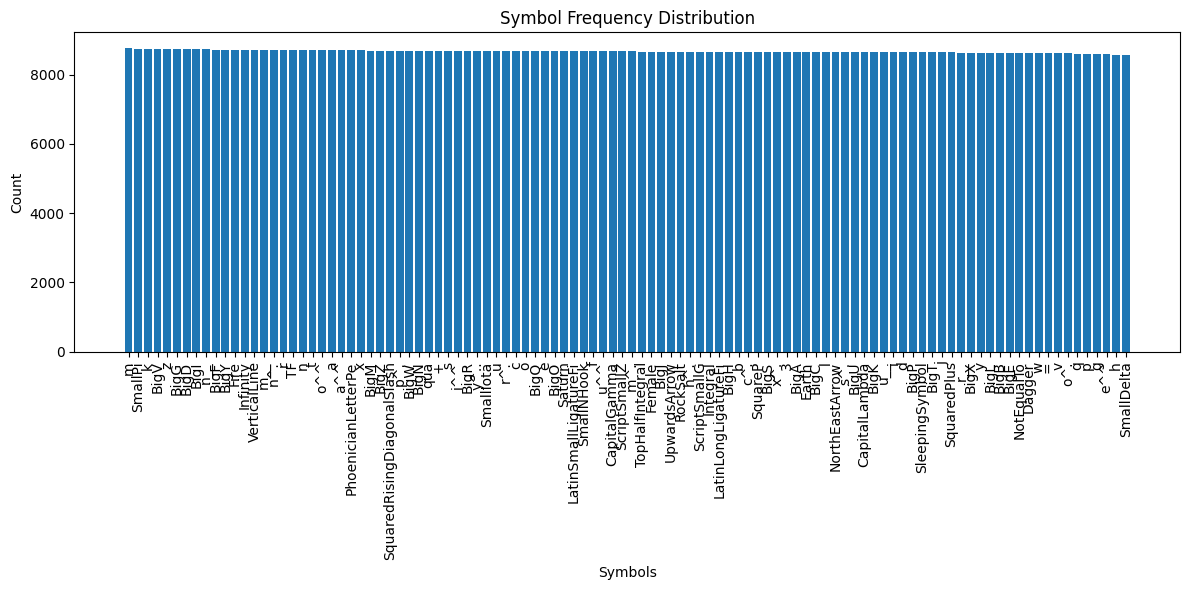

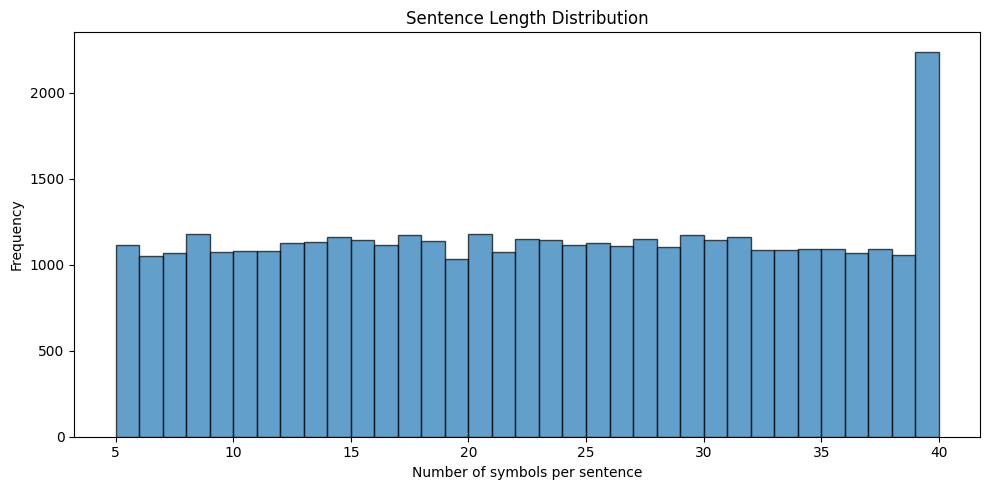

In [4]:
if __name__ == "__main__":
    # Path to your generated JSON file
    json_path = "/home/moliveros/Datasets/SymbolGeneratorDataset/train_data.json"
    
    # Analyze the symbol frequency
    analyze_symbol_frequency(json_path)